In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
cd ..

C:\Users\penthotal\Desktop\git_repositories


In [19]:
import numpy as np

import pymc3 as pm

from modules.neural_networks import BayesianMLP

from sktime.datasets.base import load_airline

import matplotlib.pyplot as plt

# One Step Ahead Forecast

In [30]:
X = load_airline().values
X = (X - X.mean()) - X.std()
 
input_x = []
input_y = []

for i in range(len(X) - 5):
    
    input_x.append(X[i: i+5])
    input_y.append(X[i+5])
    
input_x = np.array(input_x).reshape((-1, 5))
input_y = np.array(input_y)

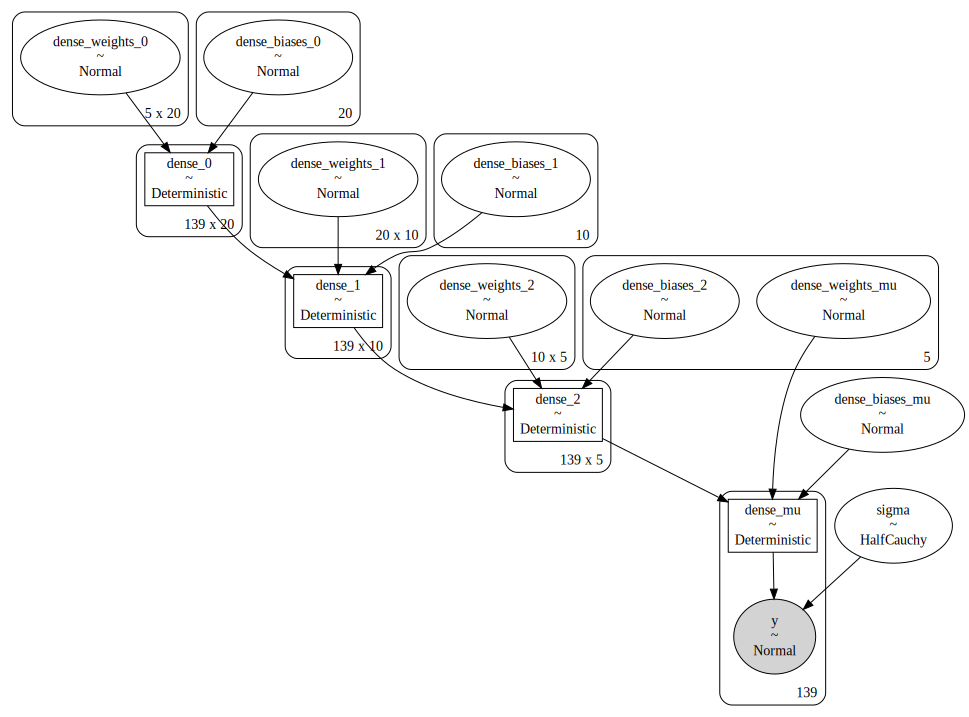

In [31]:
mlp = BayesianMLP(
    X=input_x, 
    y=input_y, 
    shape_out=1, 
    likelyhood_model='gaussian_lk',
    layers=(20, 10, 5), 
    activation='tanh',
    prior=pm.Normal,
    advi_approx=True,
    mu=0,
    sigma=0.1,
    batch_size=32
)
mlp.show_graph()

In [38]:
mlp.fit(n=100000)
mlp_traces = mlp.predict(
    input_x, 
    input_y,
)

Finished [100%]: Average Loss = 210.78


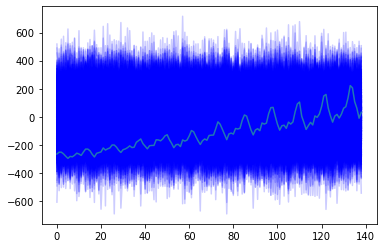

In [42]:
plt.plot(
    mlp_traces['y'].T,
    alpha=0.2,
    c='b'
)
plt.plot(input_y)